In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Class 5: Managing Data with Pandas 

Pandas is a Python library for managing datasets. Documentation and examples are available on the website for Pandas: http://pandas.pydata.org/. 

In this Notebook, we'll make use of a dataset containing long-run averages of inflation, money growth, and real GDP. The dataset is available here: https://www.briancjenkins.com/data/csv/qtyTheoryData.csv (Python code to generate the dataset: https://github.com/letsgoexploring/economic-data). Recall that the quantity theory of money implies the following linear relationship between the long-run rate of money growth, the long-run rate of inflation, and the long-run rate of real GDP growth in a country:

\begin{align}
\text{inflation} & = \text{money growth} - \text{real GDP growth},
\end{align}

Generally, we treat real GDP growth and money supply growth as exogenous so this is a theory about the determination of inflation.

### Import Pandas

In [2]:
import pandas as pd

### Import data from a csv file

Pandas has a function called `read_csv()` for reading data from a csv file into a Pandas `DataFrame` object.

In [3]:
# Import quantity theory data into a Pandas DataFrame called 'df' with country names as the index.

# Directly from internet
df = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/quantity-theory/csv/quantity_theory_data.csv')

# From current working directory
# df = pd.read_csv('qtyTheoryData.csv')

In [4]:
# Print the first 5 rows
print(df.head())

               country iso code  observations  inflation  money growth  \
0              Albania      ALB            21    0.05453       0.12879   
1              Algeria      DZA            51    0.10913       0.16370   
2               Angola      AGO            20    0.88679       1.08457   
3  Antigua and Barbuda      ATG            38    0.04052       0.09903   
4            Argentina      ARG            54    0.74972       0.79170   

   gdp growth  
0     0.04829  
1     0.03896  
2     0.08592  
3     0.03673  
4     0.02468  


In [5]:
# Print the last 10 rows
print(df.tail(10))

                  country iso code  observations  inflation  money growth  \
168               Ukraine      UKR            23    0.61867       0.58537   
169  United Arab Emirates      ARE            40    0.03659       0.14033   
170         United States      USA            54    0.03442       0.05753   
171               Uruguay      URY            54    0.37658       0.41383   
172               Vanuatu      VUT            36    0.03611       0.08343   
173         Venezuela, RB      VEN            53    0.20726       0.27581   
174    West Bank and Gaza      PSE            17    0.03864       0.12528   
175           Yemen, Rep.      YEM            24    0.14770       0.13852   
176                Zambia      ZMB            27    0.22850       0.24470   
177              Zimbabwe      ZWE            32   -0.00128      -0.13307   

     gdp growth  
168    -0.01070  
169     0.04811  
170     0.03140  
171     0.02294  
172     0.02972  
173     0.02793  
174     0.03389  
175     

In [6]:
# Print the type of variable 'df'
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### Properties of `DataFrame` objects

Like entries in a spreadsheet file, elements in a `DataFrame` object have row (or *index*) and column coordinates. Column names are always strings. Index elements can be integers, strings, or dates.

In [7]:
# Print the columns of df
print(df.columns)

Index(['country', 'iso code', 'observations', 'inflation', 'money growth',
       'gdp growth'],
      dtype='object')


In [8]:
# Create a new variable called money equal to the 'money growth' column and print
money = df['money growth']
print(money)

0      0.12879
1      0.16370
2      1.08457
3      0.09903
4      0.79170
        ...   
173    0.27581
174    0.12528
175    0.13852
176    0.24470
177   -0.13307
Name: money growth, Length: 178, dtype: float64


In [9]:
# Print the type of the variable money
print(type(money))

<class 'pandas.core.series.Series'>


A Pandas `Series` stores one column of data. Like a `DataFrame`, a `Series` object has an index. Note that `money` has the same index as `df`. Instead of having a column, the `Series` has a `name` attribute.

In [10]:
# Print the name of the 'money' variable
print(money.name)

money growth


Select multiple columns of a `DataFrame` by puting the desired column names in a set a of square brackets (i.e., in a `list`).

In [11]:
# Print the first 5 rows of just the inflation, money growth, and gdp growth columns
print(df[['inflation','money growth','gdp growth']].head())

   inflation  money growth  gdp growth
0    0.05453       0.12879     0.04829
1    0.10913       0.16370     0.03896
2    0.88679       1.08457     0.08592
3    0.04052       0.09903     0.03673
4    0.74972       0.79170     0.02468


As mentioned, the set of row coordinates is the index. Unless specified otherwise, Pandas automatically assigns an integer index starting at 0 to rows of the `DataFrame`.

In [12]:
# Print the index of 'df'
print(df.index)

RangeIndex(start=0, stop=178, step=1)


Note that in the index of the `df` is the numbers 0 through 177. We could have specified a different index when we imported the data using `read_csv()`. For example, suppose we want to the country names to be the index of `df`. Since country names are in the first column of the data file, we can pass the argument `index_col=0` to `read_csv()`

In [13]:
# Import quantity theory data into a Pandas DataFrame called 'df' with country names as the index.
df = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/quantity-theory/csv/quantity_theory_data.csv',index_col=0)

# Print first 5 rows of df
print(df.head())

                    iso code  observations  inflation  money growth  \
country                                                               
Albania                  ALB            21    0.05453       0.12879   
Algeria                  DZA            51    0.10913       0.16370   
Angola                   AGO            20    0.88679       1.08457   
Antigua and Barbuda      ATG            38    0.04052       0.09903   
Argentina                ARG            54    0.74972       0.79170   

                     gdp growth  
country                          
Albania                 0.04829  
Algeria                 0.03896  
Angola                  0.08592  
Antigua and Barbuda     0.03673  
Argentina               0.02468  


Use the `loc` attribute to select rows of the `DataFrame` by index *values*.

In [14]:
# Create a new variable called 'df_usa' equal to the 'United States' row and print
df_usa = df.loc['United States']
print(df_usa)

iso code            USA
observations         54
inflation       0.03442
money growth    0.05753
gdp growth       0.0314
Name: United States, dtype: object


Use `iloc` attribute to select row based on integer location (starting from 0).

In [15]:
# Create a new variable called 'df_third' equal to the third row in the DataFrame and print
df_first = df.iloc[2]
print(df_first)

iso code            AGO
observations         20
inflation       0.88679
money growth    1.08457
gdp growth      0.08592
Name: Angola, dtype: object


There are several ways to return a single element of a Pandas `DataFrame`. For example, here are three that we want to return the value of inflation for the United States from the DataFrame `df`:

1. `df.loc['United States','inflation']`
2. `df.loc['United States']['inflation']`
3. `df['inflation'].loc['United States']`

The first method points directly to the element in the `df` while the second and third methods return *copies* of the element. That means that you can modify the value of inflation for the United States by running:

    df.loc['United States','inflation'] = new_value
    
But running either:

    df.loc['United States']['inflation'] = new_value
    
or:

    df['inflation'].loc['United States'] = new_value

will return an error.

In [16]:
# Print the inflation rate of the United States  (By index and column together)
print('Long-run average inflation in US: ',df.loc['United States','inflation'])

Long-run average inflation in US:  0.03442


In [17]:
# Print the inflation rate of the United States (first by index, then by column)
print('Long-run average inflation in US: ',df.loc['United States']['inflation'])

Long-run average inflation in US:  0.03442


In [18]:
# Print the inflation rate of the United States  (first by column, then by index)
print('Long-run average inflation in US: ',df['inflation'].loc['United States'])

Long-run average inflation in US:  0.03442


New columns are easily created as functions of existing columns.

In [19]:
# Create a new column called 'difference' equal to the money growth column minus 
# the inflation column and print the modified DataFrame
df['difference'] = df['money growth'] - df['inflation']
print(df['difference'])

country
Albania                0.07426
Algeria                0.05457
Angola                 0.19778
Antigua and Barbuda    0.05851
Argentina              0.04198
                        ...   
Venezuela, RB          0.06855
West Bank and Gaza     0.08664
Yemen, Rep.           -0.00918
Zambia                 0.01620
Zimbabwe              -0.13179
Name: difference, Length: 178, dtype: float64


In [20]:
# Print the average difference between money growth and inflation
print(df.difference.mean())

0.06339837078651682


In [21]:
# Remove the following columns from the DataFrame: 'iso code','observations','difference'
df = df.drop(['observations','difference'],axis=1)

# Print the modified DataFrame
print(df)

                    iso code  inflation  money growth  gdp growth
country                                                          
Albania                  ALB    0.05453       0.12879     0.04829
Algeria                  DZA    0.10913       0.16370     0.03896
Angola                   AGO    0.88679       1.08457     0.08592
Antigua and Barbuda      ATG    0.04052       0.09903     0.03673
Argentina                ARG    0.74972       0.79170     0.02468
...                      ...        ...           ...         ...
Venezuela, RB            VEN    0.20726       0.27581     0.02793
West Bank and Gaza       PSE    0.03864       0.12528     0.03389
Yemen, Rep.              YEM    0.14770       0.13852     0.04008
Zambia                   ZMB    0.22850       0.24470     0.01208
Zimbabwe                 ZWE   -0.00128      -0.13307     0.00839

[178 rows x 4 columns]


### Methods

A Pandas `DataFrame` has a bunch of useful methods defined for it. `describe()` returns some summary statistics.

In [22]:
# Print the summary statistics for 'df'
print(df.describe())

        inflation  money growth  gdp growth
count  178.000000    178.000000  178.000000
mean     0.128568      0.191966    0.037594
std      0.172497      0.170733    0.022616
min     -0.001280     -0.133070   -0.025240
25%      0.042493      0.102785    0.024382
50%      0.070050      0.140935    0.037745
75%      0.132060      0.210498    0.048245
max      1.277050      1.224430    0.165480


The `corr()` method returns a `DataFrame` containing the correlation coefficients of the specified `DataFrame`.

In [23]:
# Create a variable called 'correlations' containg the correlation coefficients for columns in 'df'
correlations = df.corr()

# Print the correlation coefficients
print(correlations)

              inflation  money growth  gdp growth
inflation      1.000000      0.971200   -0.041515
money growth   0.971200      1.000000    0.088061
gdp growth    -0.041515      0.088061    1.000000


In [24]:
# Print the correlation coefficient for inflation and money growth
print('corr of inflation and money growth: ',round(correlations.loc['inflation','money growth'],4))

# Print the correlation coefficient for inflation and real GDP growth
print('corr of inflation and gdp growth:   ',round(correlations.loc['inflation','gdp growth'],4))

# Print the correlation coefficient for money growth and real GDP growth
print('corr of money growth and gdp growth:',round(correlations.loc['money growth','gdp growth'],4))

corr of inflation and money growth:  0.9712
corr of inflation and gdp growth:    -0.0415
corr of money growth and gdp growth: 0.0881


`sort_values()` returns a copy of the original `DataFrame` sorted along the given column. The optional argument `ascending` is set to `True` by default, but can be changed to `False` if you want to print the lowest first.

In [25]:
# Print rows for the countries with the 10 lowest inflation rates
print(df.sort_values('inflation').head(10))

                     iso code  inflation  money growth  gdp growth
country                                                           
Zimbabwe                  ZWE   -0.00128      -0.13307     0.00839
Djibouti                  DJI    0.00035       0.07940     0.01683
Germany                   DEU    0.01120       0.07852     0.01233
Hong Kong SAR, China      HKG    0.01452       0.10295     0.03778
Ireland                   IRL    0.01467       0.13223     0.03552
France                    FRA    0.01560       0.07038     0.01316
Kosovo                    KSV    0.01659       0.09355     0.03622
Greece                    GRC    0.01736       0.01533    -0.00487
Switzerland               CHE    0.01754       0.06243     0.01750
Austria                   AUT    0.01757       0.08010     0.01543


In [26]:
# Print rows for the countries with the 10 highest inflation rates
print(df.sort_values('inflation',ascending=False).head(10))

                 iso code  inflation  money growth  gdp growth
country                                                       
Congo, Dem. Rep.      COD    1.27705       1.22443    -0.00239
Brazil                BRA    0.88891       0.92023     0.04208
Angola                AGO    0.88679       1.08457     0.08592
Argentina             ARG    0.74972       0.79170     0.02468
Nicaragua             NIC    0.62762       0.67775     0.02522
Belarus               BLR    0.62519       0.65668     0.05171
Ukraine               UKR    0.61867       0.58537    -0.01070
Peru                  PER    0.48310       0.54905     0.03510
Armenia               ARM    0.46680       0.48970     0.05726
Azerbaijan            AZE    0.45091       0.52949     0.05724


Note that `sort_values` and `sort_index` return *copies* of the original `DataFrame`. If, in the previous example, we had wanted to actually modify `df`, we would have need to explicitly overwrite it:

    df = df.sort_index(ascending=False)

In [27]:
# Print first 10 rows with the index sorted in descending alphabetical order
print(df.sort_index(ascending=False).head(10))

                     iso code  inflation  money growth  gdp growth
country                                                           
Zimbabwe                  ZWE   -0.00128      -0.13307     0.00839
Zambia                    ZMB    0.22850       0.24470     0.01208
Yemen, Rep.               YEM    0.14770       0.13852     0.04008
West Bank and Gaza        PSE    0.03864       0.12528     0.03389
Venezuela, RB             VEN    0.20726       0.27581     0.02793
Vanuatu                   VUT    0.03611       0.08343     0.02972
Uruguay                   URY    0.37658       0.41383     0.02294
United States             USA    0.03442       0.05753     0.03140
United Arab Emirates      ARE    0.03659       0.14033     0.04811
Ukraine                   UKR    0.61867       0.58537    -0.01070


### Quick plotting example

Construct a graph that visually confirms the quantity theory of money by making a scatter plot with average money growth on the horizontal axis and average inflation on the vertical axis. Set the marker size `s` to 50 and opacity (`alpha`) 0.25. Add a 45 degree line, axis labels, and a title. Lower and upper limits for the horizontal and vertical axes should be -0.2 and 1.2.

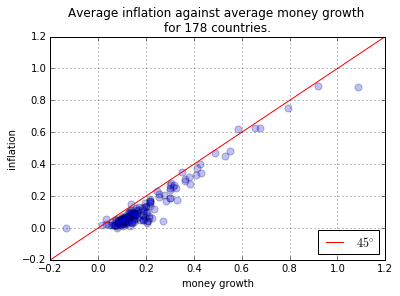

In [28]:
# Create data for 45 degree line
x45 = [-0.2,1.2]
y45 = [-0.2,1.2]

# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot 45 degree line and create legend in lower right corner
ax.plot(x45,y45,'-r',label = '$45^{\circ}$')
ax.legend(loc='lower right')

# Scatter plot of data inflation against money growth
ax.scatter(df['money growth'],df['inflation'],s=50,alpha = 0.25)
ax.set_xlim([-0.2,1.2])
ax.set_ylim([-0.2,1.2])
ax.set_xlabel('money growth')
ax.set_ylabel('inflation')
ax.set_title('Average inflation against average money growth \nfor '+str(len(df.index))+' countries.')
ax.grid()

### Exporting a `DataFrame` to csv

Use the DataFrame method `to_csv()` to export DataFrame to a csv file.

In [29]:
# Export the DataFrame 'df' to a csv file called 'modified_data.csv'.
df.to_csv('modified_data.csv')